<a href="https://colab.research.google.com/github/Churabros/Moringa_phase2_project/blob/main/Phase_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2 Project
## DS-PT10
####Rose Gitau

# Overview

This project aims to guide our company's film production strategy as we embark on the exciting journey of establishing a new movie studio. In the rapidly evolving entertainment industry, where major companies are increasingly investing in original video content to capture audience attention, it is essential for us to understand the current landscape of successful films. By synthesizing data from sources like Box Office Mojo and IMDB, this report identifies key trends that will inform our decisions on the types of films to produce. This analysis will enable our new studio to strategically plan and create films that are more likely to succeed at the box office, ensuring we maintain a competitive edge in the market despite our lack of experience in this domain.



# Business understanding

The film industry is a highly competitive and dynamic sector, where the success of a movie depends on various factors, including genre, budget, runtime,  and release timing. By analyzing these factors, we can gain insights into what makes a movie successful and use this knowledge to guide our production choices. This knowledge will be essential in making informed business decisions that enhance our chances of success.



# Objectives

1. Identify the top-grossing movie genres to determine which consistently yield high-performing films.
2. Compare production costs with revenue to find the best investment strategies for maximizing returns.
3. Analyze movie ratings and audience preferences to uncover the factors that drive viewer satisfaction.
4.	Forecast the most profitable movie genres for the company.


# Data Understanding
The Data that was used for this analysis was pulled from the following sources:

`tn.movie_budgets.csv` which can be found in  [The Numbers database](https://www.the-numbers.com/)

`tmdb.movies.csv` which can be found in  [Movies DB database](https://www.themoviedb.org/)

`rt.movie_info.tsv` which can be found in  [Rotten tomatos database](https://www.rottentomatoes.com/)

`im.db` which can be found in  [IMDB database](https://www.imdb.com/)


The Specific rows used in the data set are

* `budget_release_date` - The date the movie was released
* `title` - The title of the Movie
* `domestic_gross` - The money the movie made in the country it was made
* `worldwide_gross` - The money the movie made around the world
* `region` - the country the movie was made
* `runtime_minutes` - The duration of the movie in minutes  
* `genre` - The genre of the movie

###Importing Libraries

We begin by importing the necessary libraries for data manipulation, analysis, and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import sqlite3
import statsmodels.api as sm
import warnings
import scipy.stats as stats

warnings.filterwarnings('ignore')

###Importing Datasets

We then import the datasets required for our analysis. We will also establish a connection to an SQLite database where some of our data may be stored.

The datasets are:
- `df_budget`: Contains movie budget information.
- `df_tmdf`: Contains movie details from TMDB.
- `df_gross`: Contains box office gross revenue information.
- `df_rev`: Contains Rotten Tomatoes reviews.
- `df_info`: Contains movie information from Rotten Tomatoes.


In [ ]:
#Imported Datasets
df_budget = pd.read_csv('./ZippedData/tn.movie_budgets.csv.gz')
df_tmdf = pd.read_csv('./ZippedData/tmdb.movies.csv.gz')
df_gross = pd.read_csv('./ZippedData/bom.movie_gross.csv.gz')
df_rev = pd.read_csv('./ZippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin1') # Try using 'latin1' encoding
df_info = pd.read_csv('./ZippedData/rt.movie_info.tsv.gz', sep='\t')
path = './ZippedData/im.db'
conn = sqlite3.connect(path)

We will use these datasets to perform our analysis and gain insights into the factors that contribute to a movie's success.

# Data Exploration

We begin our data exploration by examining the first few rows of the `df_info` dataset, therefore, we can identify the columns available and check for any potential issues with the data.

In [ ]:
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Next, we explore the `df_budget` dataset. This dataset contains information about the budgets of various movies.

In [ ]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


We now examine the `df_budget` dataset's structure and data types using the `.info()` method.

In [ ]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Next, we explore the `df_tmdf` dataset by displaying the first few rows.

In [ ]:
df_tmdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
df_tmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


We continue our data exploration by examining the first few rows of the `df_gross` dataset. This dataset contains information about the box office gross revenues of various movies.

In [ ]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:

df_imdb = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df_imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,movie_akas,movie_akas,3,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
2,table,movie_ratings,movie_ratings,4,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [ ]:

query = """ SELECT *
            FROM movie_ratings rat
            JOIN  movie_akas ak
            ON rat.movie_id = ak.movie_id
            JOIN movie_basics mb
            ON ak.movie_id = mb.movie_id """
df_imdb = pd.read_sql(query,conn)


In [ ]:
print(type(df_imdb))

<class 'pandas.core.frame.DataFrame'>


#Data Cleaning

We are now focusing on cleaning the `df_imdb` dataset by removing any duplicate columns and selecting only the relevant columns for our analysis.

In [ ]:

columns_to_keep = [ 'averagerating', 'numvotes', 'title', 'region', 'start_year', 'runtime_minutes', 'genres']
df_imdb = df_imdb.loc[:,~df_imdb.columns.duplicated()]
df_cleaned = df_imdb[columns_to_keep]
df_cleaned.head()

,averagerating,numvotes,title,region,start_year,runtime_minutes,genres
0,6.4,20,Just Inès,None,2010,90.0,Drama
1,6.4,20,Samo Ines,RS,2010,90.0,Drama
2,6.4,20,Just Inès,GB,2010,90.0,Drama
3,4.2,50352,Legenda lui Hercule,RO,2014,99.0,"Action,Adventure,Fantasy"
4,4.2,50352,La légende d'Hercule,FR,2014,99.0,"Action,Adventure,Fantasy"


By displaying the first few rows of the cleaned dataset, we can verify that the correct columns have been retained and that the data is ready for further analysis.

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   averagerating    261806 non-null  float64
 1   numvotes         261806 non-null  int64  
 2   title            261806 non-null  object 
 3   region           218341 non-null  object 
 4   start_year       261806 non-null  int64  
 5   runtime_minutes  250553 non-null  float64
 6   genres           260621 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 14.0+ MB


### Merging Datasets

In this step, we are merging multiple datasets to create a comprehensive DataFrame for analysis. The `df_budget` dataset is merged with `df_cleaned` on the `title` column to combine budget information with movie details. The previously merged DataFrame is then merged with `df_tmdf` on the `title` column to include additional movie details from TMDB.

In [ ]:

# Merging datasets
merged_df = df_budget.merge(df_cleaned, left_on='movie', right_on='title', how='left')
merged_df = merged_df.merge(df_tmdf, left_on='movie', right_on='title', how='left')
merged_df.head()


,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,title_x,region,...,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.1,43.0,Avatar,XWW,...,6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,US,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,None,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
3,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,CA,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
4,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,24451.0,Dark Phoenix,BD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are now examining the dimensions of the merged dataset by checking the number of rows and columns. This step provides an overview of the dataset's size before we proceed with any data cleaning or preprocessing. By understanding the dataset's shape, we can better plan the necessary cleaning steps and transformations.

In [ ]:
#Finding out how many rows and columns there are in the final dataset before cleaning
merged_df.shape
print("Number of rows: ", merged_df.shape[0])
print("Number of Columns: ", merged_df.shape[1])

Number of rows:  16096
Number of Columns:  23


### Dropping Columns

We are refining the merged dataset by dropping unnecessary columns and renaming columns.

In [ ]:
# Drop unnecessary columns
columns_to_drop = [
    'Unnamed: 0', 'title_x', 'title_y', 'id_y', 'id_x',
    'original_title', 'genre_ids', 'start_year',
    'vote_count', 'vote_average', 'release_date_y'
]
merged_df = merged_df.drop(columns=columns_to_drop)

# Rename columns to be more descriptive
merged_df = merged_df.rename(columns={
    'movie': 'title',  # Assuming 'movie' is the main title column
    'release_date_x': 'budget_release_date',
    'production_budget': 'budget',
    'domestic_gross': 'domestic_gross',
    'worldwide_gross': 'worldwide_gross',
    'averagerating': 'average_rating',
    'numvotes': 'num_votes',
    'region': 'region',
    'language': 'language',
    'runtime_minutes': 'runtime_minutes',
    'genres': 'genres',
    'original_language': 'original_language',
    'popularity': 'popularity'
})



The above columns were dropped since they contain infromation that is irrelevant, redundant or unnecessary not needed in the analysis process

### Handeling Duplicates

We now address duplicate entries in the dataset to ensure each movie is represented only once.


In [ ]:
# Remove any duplicate rows
merged_df['priority'] = merged_df['region'].apply(lambda x: 0 if x == 'US' else 1)
merged_df = merged_df.drop(columns='priority')

# Drop duplicates based on the 'title' column, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset='title', keep='first')

In [ ]:
merged_df.head()

,budget_release_date,title,budget,domestic_gross,worldwide_gross,average_rating,num_votes,region,runtime_minutes,genres,original_language,popularity
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.1,43.0,XWW,93.0,Horror,en,26.526
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624.0,US,136.0,"Action,Adventure,Fantasy",en,30.579
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,24451.0,BD,113.0,"Action,Adventure,Sci-Fi",NaN,NaN
8,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",7.3,665594.0,IT,141.0,"Action,Adventure,Sci-Fi",en,44.383
13,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 16095
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget_release_date  5698 non-null   object 
 1   title                5698 non-null   object 
 2   budget               5698 non-null   object 
 3   domestic_gross       5698 non-null   object 
 4   worldwide_gross      5698 non-null   object 
 5   average_rating       2313 non-null   float64
 6   num_votes            2313 non-null   float64
 7   region               1647 non-null   object 
 8   runtime_minutes      2255 non-null   float64
 9   genres               2311 non-null   object 
 10  original_language    1924 non-null   object 
 11  popularity           1924 non-null   float64
dtypes: float64(4), object(8)
memory usage: 578.7+ KB


## Changing Data types

As seen above the `domestic_gross`, `worldwide_gross` and `budget` columns are strings and need to be change to floats. the `budget_release_date`column needs to be changed to datetime datatype

The `'budget_release_date'` column is converted to datetime format using `pd.to_datetime()`. This transformation allows us to perform date-related operations and analyses more effectively.

In [ ]:
# Function to clean currency columns and convert to float
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

# Applying the function to the relevant columns
merged_df['budget'] = merged_df['budget'].apply(clean_currency)
merged_df['domestic_gross'] = merged_df['domestic_gross'].apply(clean_currency)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].apply(clean_currency)

# Converting budget_release_date to datetime
merged_df['budget_release_date'] = pd.to_datetime(merged_df['budget_release_date'])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 16095
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget_release_date  5698 non-null   datetime64[ns]
 1   title                5698 non-null   object        
 2   budget               5698 non-null   float64       
 3   domestic_gross       5698 non-null   float64       
 4   worldwide_gross      5698 non-null   float64       
 5   average_rating       2313 non-null   float64       
 6   num_votes            2313 non-null   float64       
 7   region               1647 non-null   object        
 8   runtime_minutes      2255 non-null   float64       
 9   genres               2311 non-null   object        
 10  original_language    1924 non-null   object        
 11  popularity           1924 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 578.7+ KB


### Handeling Nulls

We are now evaluating the percentage of missing values in each column of the dataset.

In [ ]:
#finding out the percentage of duplicates each column has
merged_df.isna().mean()*100

budget_release_date     0.000000
title                   0.000000
budget                  0.000000
domestic_gross          0.000000
worldwide_gross         0.000000
average_rating         59.406809
num_votes              59.406809
region                 71.095121
runtime_minutes        60.424710
genres                 59.441909
original_language      66.233766
popularity             66.233766
dtype: float64

As seen above most rows contain null values

For columns with a high percentage of missing values, we fill these null values with the placeholder `'Unknown'`. We then remove rows with any remaining null values in the other columns of the dataset.

In [ ]:
#drop region columns since null values is too many

merged_df['region'].fillna('Unknown', inplace=True)
merged_df['genres'].fillna('Unknown', inplace=True)
merged_df['original_language'].fillna('Unknown', inplace=True)

# Remove rows with any null values in the remaining columns
merged_df.dropna(inplace=True)

In [ ]:
merged_df.isna().mean()*100

budget_release_date    0.0
title                  0.0
budget                 0.0
domestic_gross         0.0
worldwide_gross        0.0
average_rating         0.0
num_votes              0.0
region                 0.0
runtime_minutes        0.0
genres                 0.0
original_language      0.0
popularity             0.0
dtype: float64

The percentage of missing values has significantly reduced.

To ensure the `'runtime_minutes'` column is properly formatted for analysis, we convert it to numeric format. We then calculate Mean Runtime, excluding `NaN` values. This provides a reference value to use for filling missing data. In addition, We fill `NaN` values with the calculated mean runtime. This ensures that the dataset is complete and that the runtime information is consistently represented.

In [ ]:
# Convert runtime_minutes to numeric
merged_df['runtime_minutes'] = pd.to_numeric(merged_df['runtime_minutes'], errors='coerce')

# Calculate the mean of runtime_minutes, excluding NaNs
mean_runtime = merged_df['runtime_minutes'].mean()

# Fill NaNs in runtime_minutes with the mean
merged_df['runtime_minutes'].fillna(mean_runtime, inplace=True)

To facilitate analysis, we categorize the `'runtime_minutes'` column into discrete bins. This step helps in grouping movies into runtime categories, making it easier to analyze patterns and trends related to movie length.

In [ ]:
# Define bins and labels
bins = [0, 90, 100, 120, 140, 160, 180, 200]
labels = ['0-90', '91-100', '101-120', '121-140', '141-160', '161-180', '181-200']

# Create a new column 'runtime_category'
merged_df['runtime_category'] = pd.cut(merged_df['runtime_minutes'], bins=bins, labels=labels, right=False)


In the next step, we extract the year from the `'budget_release_date'` column to facilitate time-based analysis. By converting the release date into a separate `'Year'` column, we can analyze trends and patterns over different years more effectively. This is done using the `.dt.year` attribute of the datetime column.



In [ ]:
merged_df['Year'] = merged_df['budget_release_date'].dt.year

In [ ]:
merged_df.head()

,budget_release_date,title,budget,domestic_gross,worldwide_gross,average_rating,num_votes,region,runtime_minutes,genres,original_language,popularity,runtime_category,Year
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,6.1,43.0,XWW,93.0,Horror,en,26.526,91-100,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.6,447624.0,US,136.0,"Action,Adventure,Fantasy",en,30.579,121-140,2011
8,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,7.3,665594.0,IT,141.0,"Action,Adventure,Sci-Fi",en,44.383,141-160,2015
15,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,8.5,670926.0,AL,149.0,"Action,Adventure,Sci-Fi",en,80.773,141-160,2018
29,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,6.5,329135.0,IT,120.0,"Action,Adventure,Fantasy",en,34.953,121-140,2017


# **EDA(Exploritary Data Analysis)**

Exploratory Data Analysis (EDA) is a crucial step that helps us understand the dataset's main characteristics. The EDA will involve:

- **Univariate Analysis:** Examining the distribution of individual variables.
- **Bivariate Analysis:** Exploring relationships between two variables.
- **Multivariate Analysis:** Investigating interactions among multiple variables.

Through visualizations and summary statistics, EDA helps uncover patterns, trends, and anomalies, guiding further analysis and decision-making.

## **Univariate Analysis**

This type of analysis will help us understand the basic properties of individual variables, such as central tendency, dispersion, and the shape of the distribution. Common techniques for univariate analysis include summary statistics, frequency distributions, and visualizations like histograms, box plots, and bar charts.

### **Frequency of Each genre**

In this analysis, we examine the distribution of movie genres in our dataset. By splitting the `'genres'` column, we can count the frequency of each genre and identify the most common ones. This helps us understand which genres are most prevalent in the dataset, providing insights into genre trends in movie production.

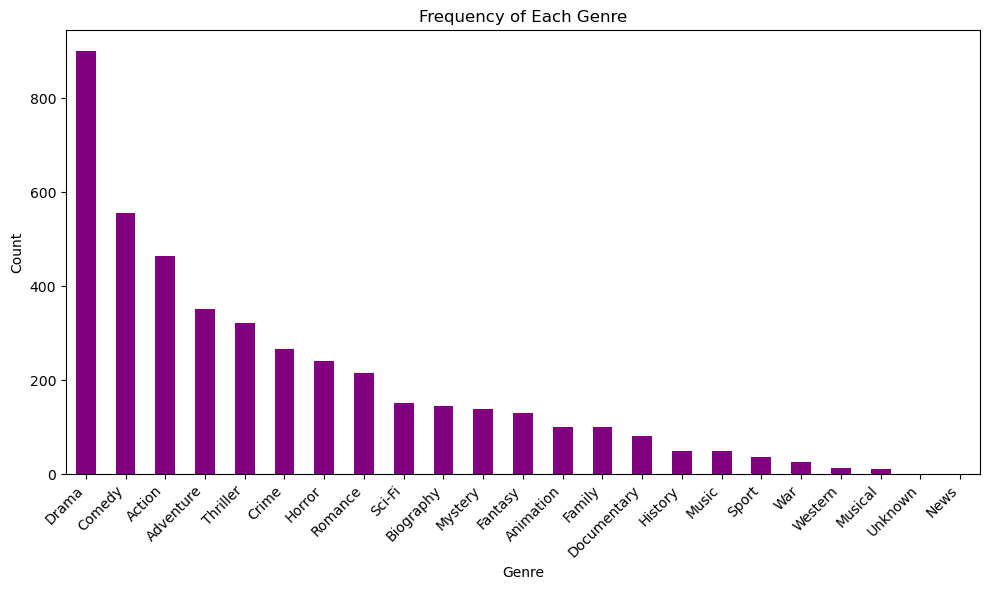

In [ ]:
# Split the 'genres' column and count each genre's frequency
genres_split = merged_df['genres'].str.split(',', expand=True).stack()
genre_counts = genres_split.value_counts()

# Identify the most frequent genre
most_frequent_genre = genre_counts.idxmax()
most_frequent_count = genre_counts.max()

# Plot the frequency of each genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



- The most frequent genres, each with over `400` occurrences, are `Action, Comedy, and Drama.`
- Among these, `Comedy` is the most frequent with over `800` occurrences.
- The three least frequent genres are News, Musical, and Western, in descending order.
- The high frequency of `Action, Comedy, and Drama` genres indicates strong market demand and safer investment opportunities, while the low frequency of News, Musical, and Western suggests a need for targeted marketing to attract niche audiences.

### **Frequency of Each runtime**

Next we explore the distribution of movies across different runtime categories. By categorizing the movies based on their runtime, we can count the number of movies that fall into each category and visualize their distribution. This helps us understand the common lengths of movies in the dataset.

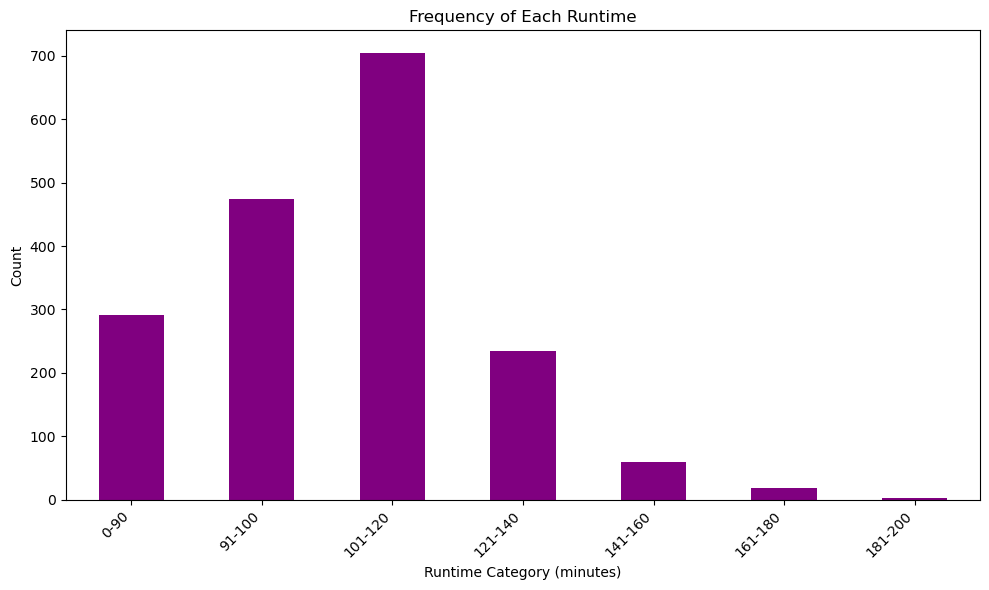

In [ ]:
runtime_category_counts = merged_df['runtime_category'].value_counts().sort_index()

# Plot the frequency of each runtime category
plt.figure(figsize=(10, 6))
runtime_category_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Each Runtime')
plt.xlabel('Runtime Category (minutes)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



- `Popular Runtime`: Movies with a runtime of 101-120 minutes have the highest frequency at approximately 700, indicating strong audience preference.
- `Longer Movies Less Frequent`: Films with runtimes of 141-160, 161-180, and 181-200 minutes each have frequencies below 100.
- `Audience Preference`: The data suggests audiences generally prefer shorter movies over extended viewing times.

### **Frequency of Each region**

We also need to examine the distribution of movies across different regions. By focusing on the top 5 regions and excluding unknown regions, we can count and visualize the frequency of movies produced or released in each region.

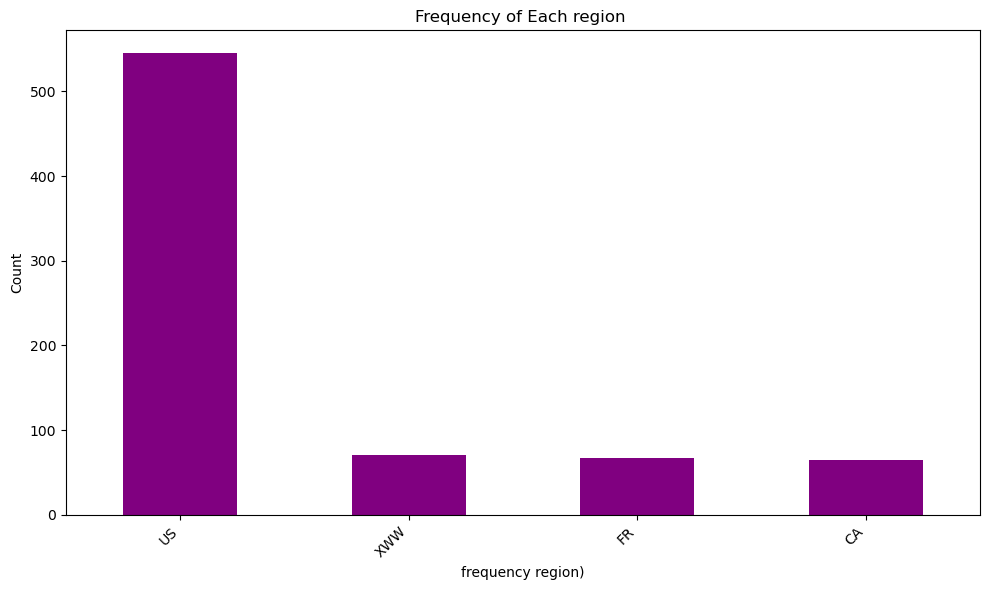

In [ ]:


#get the top 5 regins

top_5_regions = merged_df['region'].value_counts().head(5).index

# Filter the DataFrame to exclude unknown regions
filtered_regions_df = merged_df[(merged_df['region'] != 'Unknown')]

region_df = filtered_regions_df[merged_df['region'].isin(top_5_regions)]

# Count the frequency of each region in the filtered DataFrame

region_counts = region_df['region'].value_counts().sort_index().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Each region ')
plt.xlabel('frequency region)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



- `High Frequency Region`: The USA has the highest frequency with over 500 occurrences, indicating it is the most prominent region for movies.
- `Low Frequency Regions`: France and Canada have the lowest frequencies, each with below 100 occurrences.
- `Viewer Preference`: The data suggests that most viewers favor movies from the USA over those from France and Canada.

## **Bivariate Analysis**

This type of analysis helps us understand how one variable influences or is associated with another. By exploring these relationships, we can uncover patterns, correlations, and potential causations that provide deeper insights into the data.

### **Top 10 genres vs budget/worldwide gross**

The first analysis in this section will explore the relationship between movie genres and their financial performance, focusing on budget and worldwide gross. By analyzing the top 10 genres based on these financial metrics, we gain insights into which genres tend to have higher budgets and generate more revenue.

''

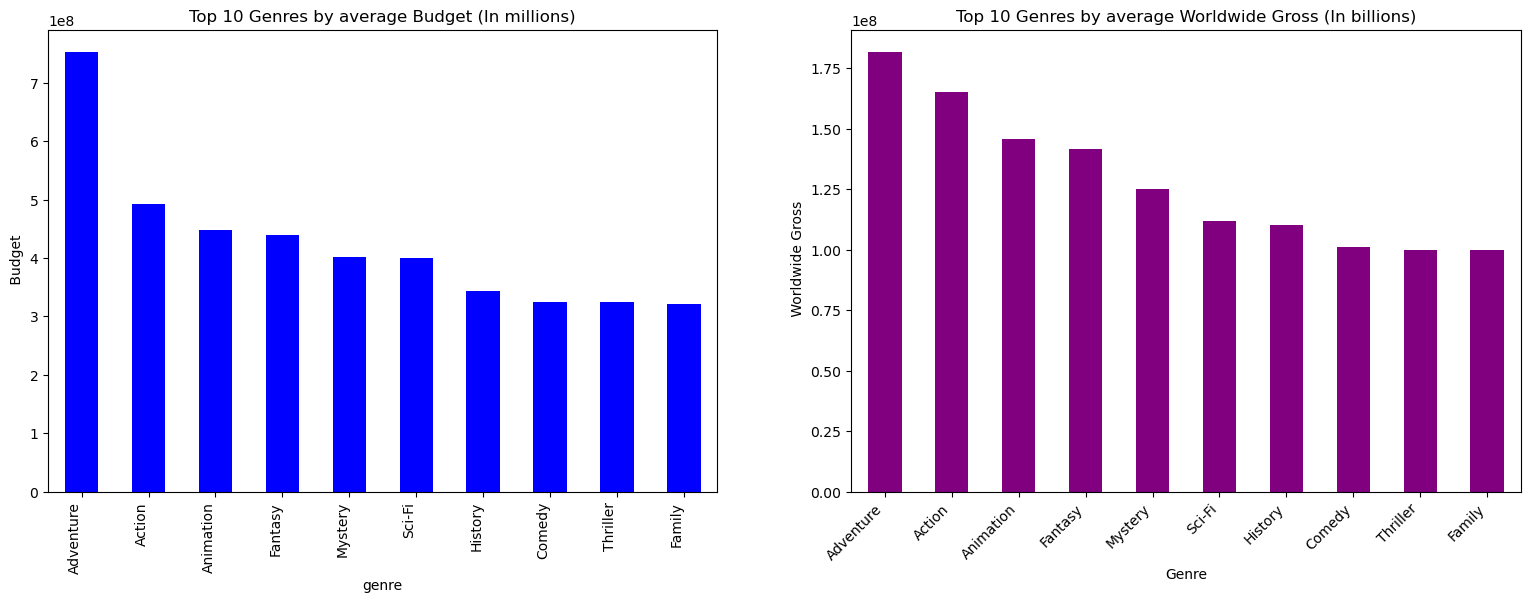

In [ ]:
# Split genres and create a new DataFrame with individual genres
genre_split = merged_df['genres'].str.split(',', expand=True).stack().reset_index(drop=True)
genre_df = merged_df.drop(columns='genres').join(genre_split.rename('genre'))

# Aggregate by genre for budget and worldwide gross
genre_budget = genre_df.groupby('genre')['budget'].mean().sort_values(ascending=False)
# Calculate average worldwide gross by genre
genre_worldwide_gross = genre_df.groupby('genre')['worldwide_gross'].mean().sort_values(ascending=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 6))
#Top 10 Genres by average Budget
genre_budget.head(10).plot(kind='bar', color='purple', ax=ax2)
ax1.set_title('Top 10 Genres by average Budget (In millions)')
ax1.set_xlabel('Genre')
ax1.set_ylabel(' Budget')
ax1.set_xticklabels(genre_budget.head(10).index, rotation=45, ha='right')
#Top 10 Genres by average Worldwide Gross
genre_worldwide_gross.head(10).plot(kind='bar', color='blue', ax=ax1)
ax2.set_title('Top 10 Genres by average Worldwide Gross (In billions)')
ax2.set_xlabel('Genre')
ax2.set_ylabel(' Worldwide Gross')
ax2.set_xticklabels(genre_worldwide_gross.head(10).index, rotation=45, ha='right')
;

- `Adventure, Action` and `Animation`: Leads in both worldwide gross and budget, indicating it generates the highest revenue and requires significant investment among the top 10 genres.
- `Comedy, Thriller, and Family`: Rank lowest in worldwide gross and budget, suggesting these genres may face challenges in achieving high revenue and require fewer resources for production.

### **Average Profit Margin by Genre**

Next, we examine the relationship between movie genres and their average profit margins. By calculating the profit margin for each movie and then averaging these margins by genre, we can identify which genres are the most profitable.

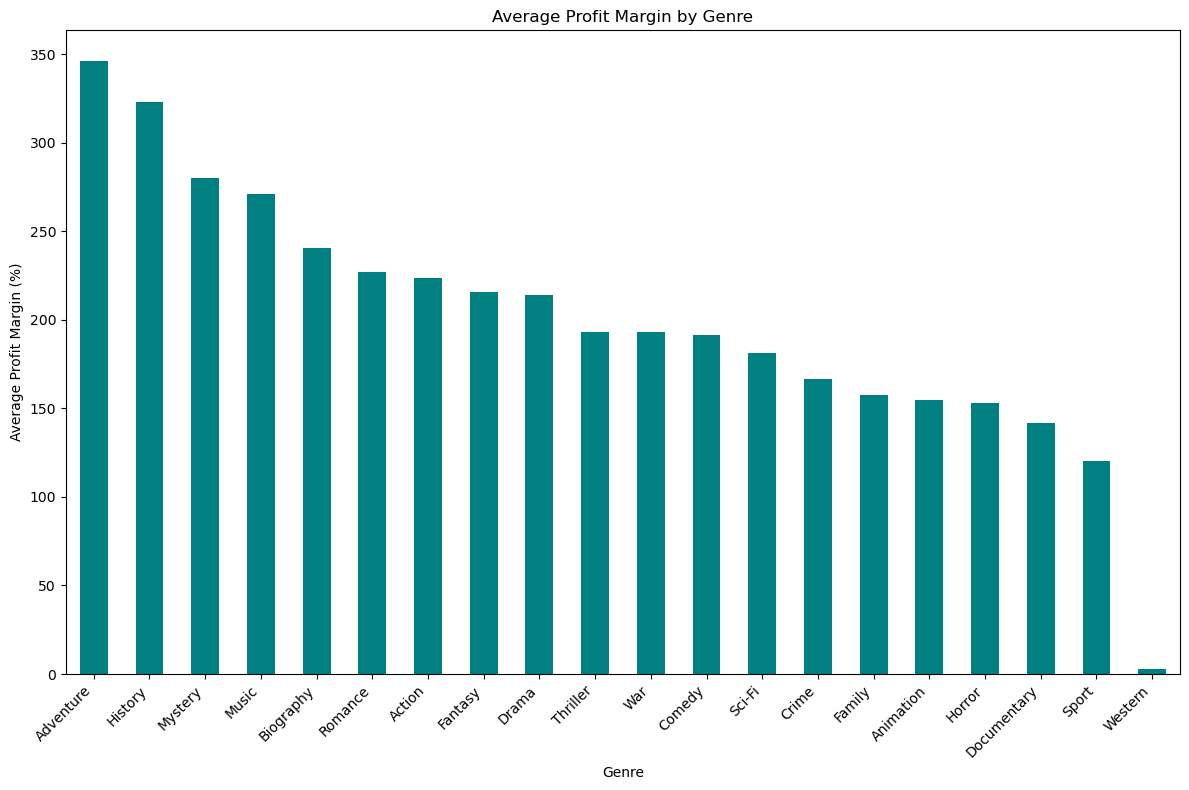

In [ ]:
merged_df['profit_margin'] = ((merged_df['worldwide_gross'] - merged_df['budget']) / merged_df['budget']) * 100

genre_split = merged_df['genres'].str.split(',', expand=True).stack().reset_index(drop=True)
genre_df = merged_df.drop(columns='genres').join(genre_split.rename('genre'))
genre_profit_margin = genre_df.groupby('genre')['profit_margin'].mean().sort_values(ascending=False)
# Create a bar plot for profit margin by genre
plt.figure(figsize=(12, 8))
genre_profit_margin.plot(kind='bar', color='teal')
plt.title('Average Profit Margin by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- `High-Profit Genres`: Investing in Adventure, History, Mystery, and Music genres is likely to yield higher returns, with Adventure being the most profitable.
- `Low-Profit Genre`: Westerns tend to have lower profitability, indicating a potential riskier investment.
- `Strategic Focus`: To maximize profit margins, the production strategy should prioritize high-margin genres while carefully evaluating the potential and marketing strategies for Westerns.

### **Top runtime vs budget/worldwide gross**

In this bivariate analysis, we get to see the relationship between movie runtime categories and their financial performance, focusing on budget and worldwide gross. By analyzing the top runtime categories based on these metrics, we gain insights into how runtime impacts financial outcomes.

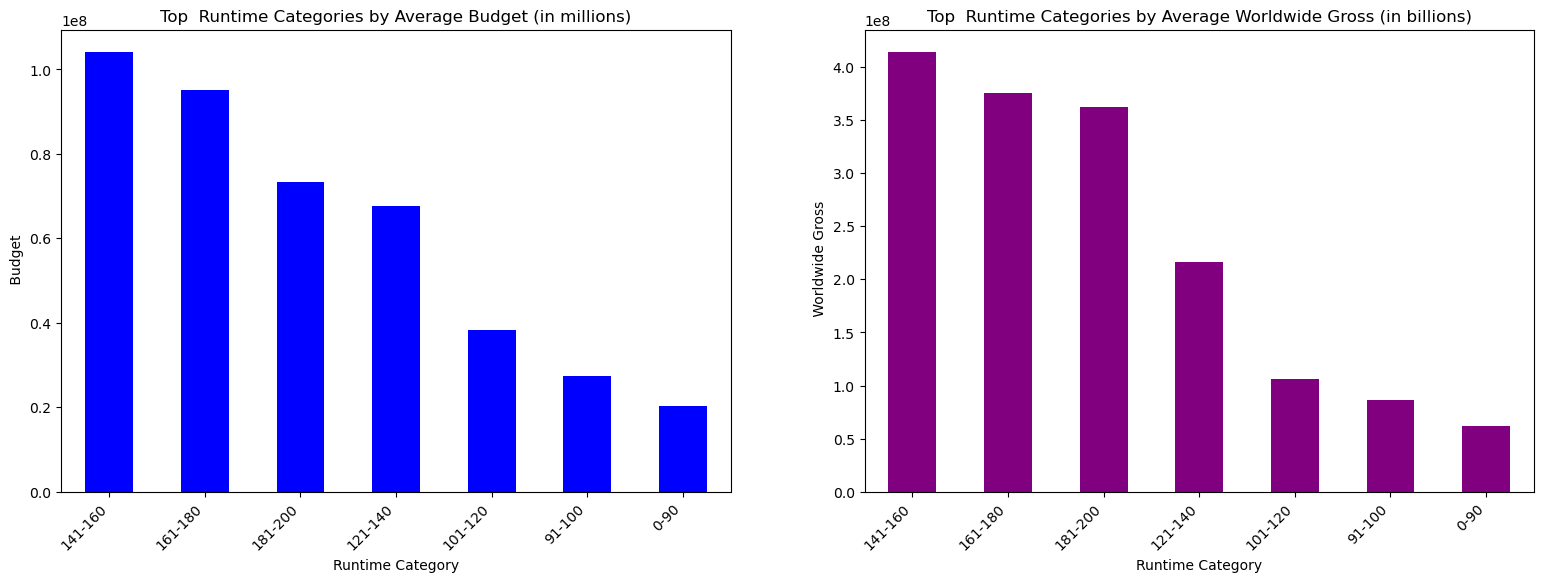

In [ ]:
# Get runtime category counts
runtime_category_counts = merged_df['runtime_category'].value_counts().sort_index()

# Aggregate by runtime category for budget
runtime_budget = merged_df.groupby('runtime_category')['budget'].mean().sort_values(ascending=False)

# Aggregate by runtime category for worldwide gross
runtime_worldwide_gross = merged_df.groupby('runtime_category')['worldwide_gross'].mean().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 6))

#Top 10 Runtime Categories by Average Budget
runtime_budget.head(10).plot(kind='bar', color='blue', ax=ax1)
ax1.set_title('Top  Runtime Categories by Average Budget (in millions)')
ax1.set_xlabel('Runtime Category')
ax1.set_ylabel(' Budget')
ax1.set_xticklabels(runtime_budget.head(10).index, rotation=45, ha='right')

# Top 10 Runtime Categories by Average Worldwide Gross
runtime_worldwide_gross.head(10).plot(kind='bar', color='purple', ax=ax2)
ax2.set_title('Top  Runtime Categories by Average Worldwide Gross (in billions)')
ax2.set_xlabel('Runtime Category')
ax2.set_ylabel(' Worldwide Gross')
ax2.set_xticklabels(runtime_worldwide_gross.head(10).index, rotation=45, ha='right');


- `Highest Profit Margins`: Movies with runtimes of 0-90 minutes and 161-180 minutes have the highest average profit margins.

- `Lowest Profit Margin`: Movies with runtimes of 91-100 minutes have the lowest profit margin.

- `Runtime Impact`: Shorter and longer movies tend to be more profitable, while medium-length movies show lower profitability.

- `Strategic Implication`: To optimize profit margins, focus on producing either shorter or longer films and investigate factors affecting profitability in medium-length movies.

### **Average profit margin by runtime**

We will now investigate the relationship between movie runtime categories and their average profit margins. By calculating the average profit margin for each runtime category, we can identify which runtime lengths tend to be the most profitable.

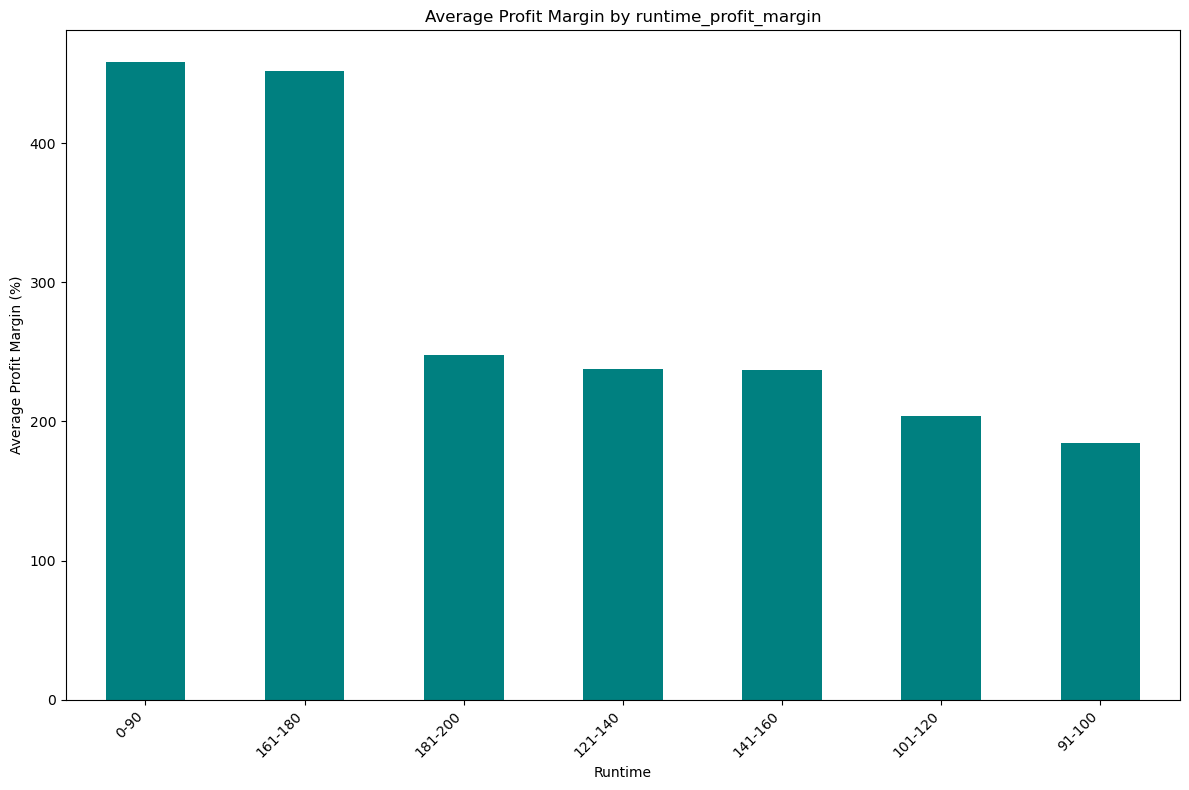

In [ ]:
runtime_profit_margin = merged_df.groupby('runtime_category')['profit_margin'].mean().sort_values(ascending=False)
# Create a bar plot for profit margin by runtime
plt.figure(figsize=(12, 8))
runtime_profit_margin.plot(kind='bar', color='teal')
plt.title('Average Profit Margin by runtime_profit_margin')
plt.xlabel('Runtime')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- `Popular Runtime`: Movies with a runtime of `101-120` minutes have the highest frequency at approximately `700`, indicating strong audience preference.
- `Longer Movies Less Frequent`: Films with runtimes of `141-160, 161-180, and 181-200` minutes each have frequencies below `100.`
- `Audience Preference`: The data suggests audiences generally prefer shorter movies over extended viewing times.

### **Budget vs Worldwide Gross**

The relationship between movie budgets and their worldwide gross revenues is also important. By plotting a scatter plot of budget against worldwide gross, we can visually assess how variations in budget correlate with financial performance.

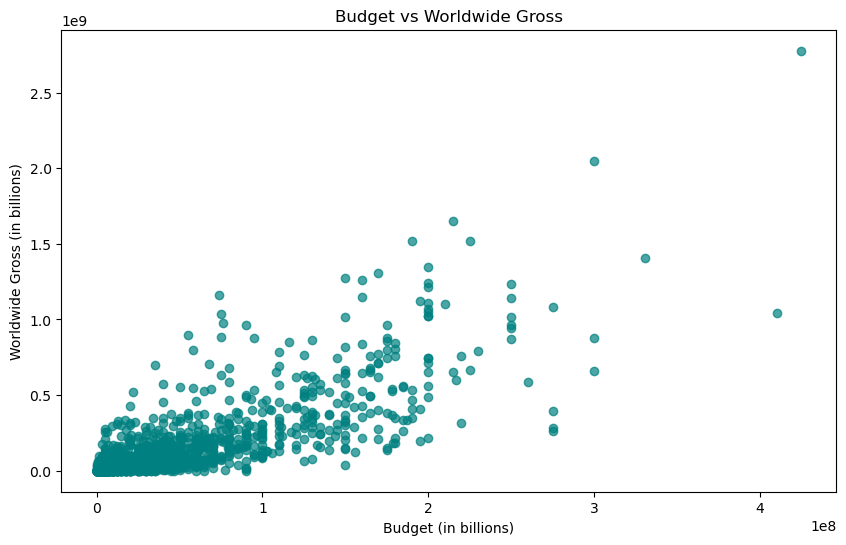

In [ ]:
# Scatter plot of budget vs worldwide gross
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['budget'], merged_df['worldwide_gross'], color='teal', alpha=0.7)
plt.title('Budget vs Worldwide Gross')
plt.xlabel('Budget (in billions)')
plt.ylabel('Worldwide Gross (in billions)')

plt.show()


- General Trend: There is a positive correlation between budget and worldwide gross. This suggests that movies with higher budgets tend to earn more revenue.


## Multivariate Analysis

This type of analysis helps us understand the complex interactions and dependencies among multiple variables, providing deeper insights into the data. Techniques such as multiple regression, factor analysis, and clustering are used in multivariate analysis to uncover patterns and relationships that cannot be seen when considering variables individually.

### **Top 10 Genres by Total Budget, Domestic Gross, and Worldwide Gross**

In this multivariate analysis, we examine the financial performance of the top 10 movie genres by considering three key financial metrics: budget, domestic gross, and worldwide gross. This analysis helps us understand the comprehensive financial impact of different genres.

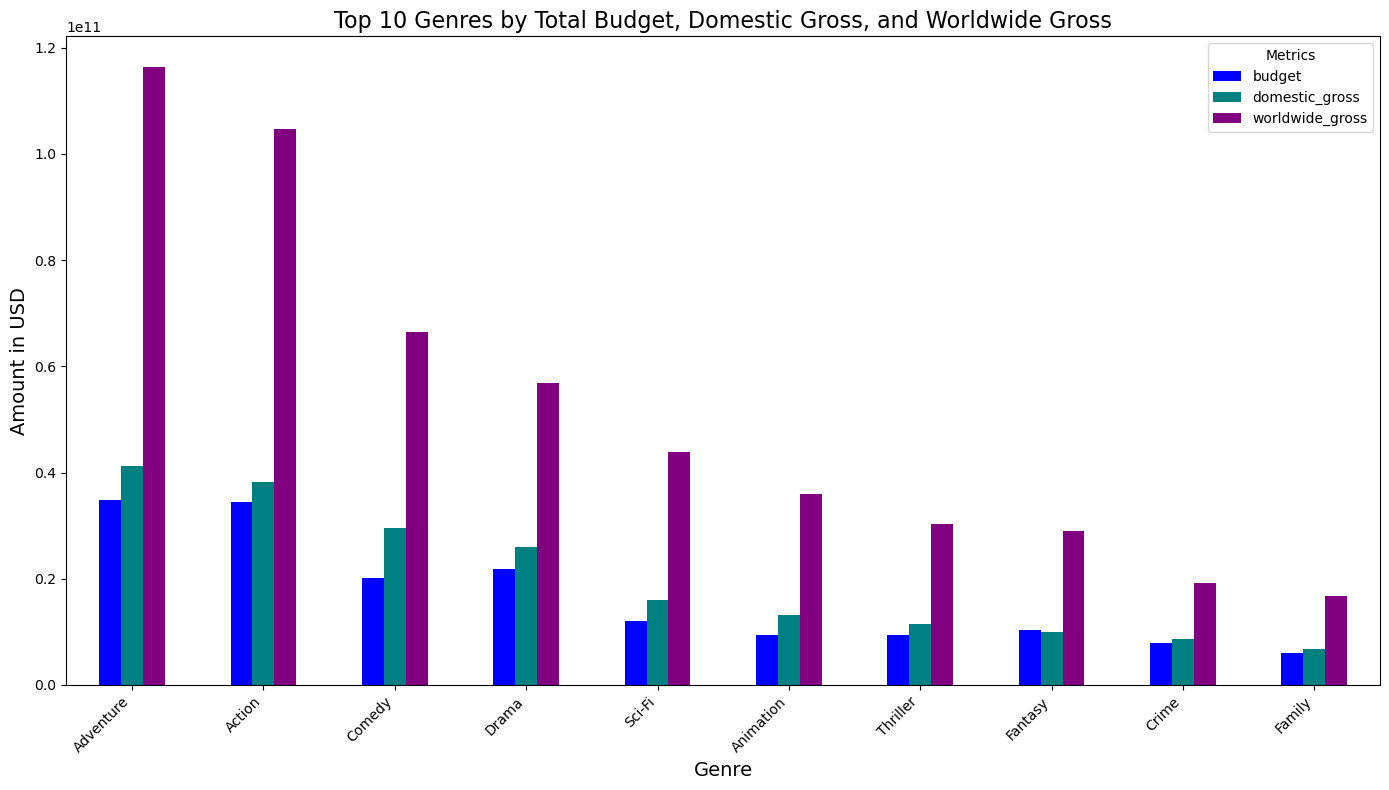

In [ ]:
#winny

# Split genres and create a new DataFrame with individual genres
genre_split = merged_df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genre_df = merged_df.drop(columns='genres').join(genre_split)

# Aggregate by genre for budget, domestic gross, and worldwide gross
genre_agg = genre_df.groupby('genre')[['budget', 'domestic_gross', 'worldwide_gross']].sum()

# Select the top 10 genres based on worldwide_gross
top_10_genres = genre_agg.nlargest(10, 'worldwide_gross')

fig, ax = plt.subplots(figsize=(14, 8))
colors = ['blue', 'teal', 'purple']

top_10_genres.plot(kind='bar', ax=ax, color = colors)

# Top 10 Genres by Total Budget, Domestic Gross, and Worldwide Gross
ax.set_title('Top 10 Genres by Total Budget, Domestic Gross, and Worldwide Gross', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Amount in USD', fontsize=14)
ax.legend(title='Metrics')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



- `Highest`: Adventure ranks highest in domestic gross, worldwide gross, and budget, followed by Action in second place.

- `Lowest`: Family ranks lowest among the top 10 genres in these metrics.

- `Implication`: Prioritize investment in Adventure and Action genres for better financial returns, while exploring ways to enhance the performance of Family films.

### **Correlation Heatmap of Numeric Features**

We explore the relationships between various numeric features of the dataset by computing and visualizing their correlation matrix. Correlation analysis helps us understand the strength and direction of linear relationships between pairs of variables.


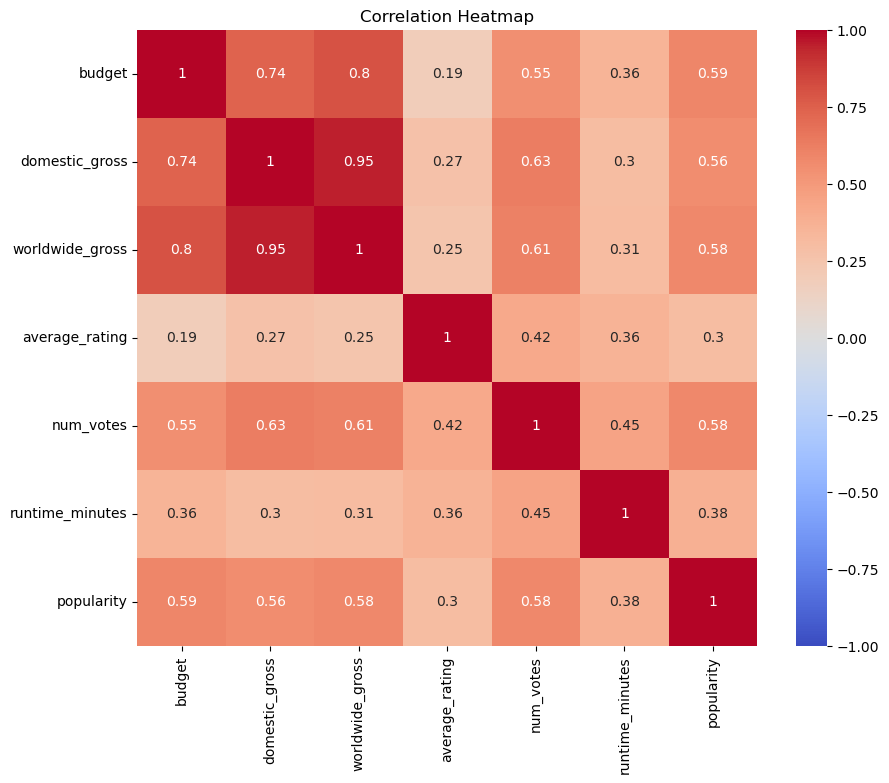

In [ ]:
#winny
# Select only the numeric columns
numeric_cols = ['budget', 'domestic_gross', 'worldwide_gross', 'average_rating', 'num_votes', 'runtime_minutes', 'popularity']

# Ensure the columns exist in the DataFrame
numeric_df = merged_df[numeric_cols]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()


> This heatmap allows us to quickly identify strong positive or negative correlations, as well as any weak or negligible relationships, helping us understand how different numeric features interact with each other.



- `Budget and worldwide_gross` has correlation of `0.802889` This indicates a strong positive correlation, meaning higher budgets tend to be associated with higher worldwide gross.
- `Domestic_gross and worldwide_gross` also has strong corrleation of `0.947102` which shows very high correlation suggests that movies that perform well domestically also perform well worldwide.
- `num_votes and popularity` also has moderate correlation of `0.584154` indicating a strong positive correlation, suggesting that movies with more votes tend to be more popular.

- `Budget and domestic_gross`  has a high corrleation of `0.739963`
- Finally `budget and popularity` has moderate correlation of `0.591660` showcasing a higher-budget movies tend to be more popular.
- On the other side `average_rating` has lower correlations with most other variables, indicating that the average rating is less influenced by budget, gross, etc.
- From here the best potential predictors for the model are
1. `budget`
2. `num_votes`
2. `runtime_minutes`
4. `popularity`  
- Since  `domestic_gross` and `worldwide_gross` are highly correlated, we will choose the latter as target varible.

## Linear regression Model

We build a linear regression model to predict the worldwide gross of movies based on several numeric features. Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.

In [ ]:

# Select only the relevant numeric columns
numeric_columns = ['budget', 'num_votes', 'runtime_minutes', 'popularity']
data = merged_df[numeric_columns + ['worldwide_gross']].dropna()

# Define features (X) and target variable (y)
X = data[numeric_columns]
y = data['worldwide_gross']

# Add constant term for intercept
X_with_const = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X_with_const).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1006.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:35:23   Log-Likelihood:                -35877.
No. Observations:                1788   AIC:                         7.176e+04
Df Residuals:                    1783   BIC:                         7.179e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.625e+07   1.87e+07     

- `R-squared = 0.693` means that approximately `69.3%` of the variance in the target variable `worldwide_gross` can be explained by the predictors in the model. This indicates a good fit, showing that the model explains a substantial portion of the variability in `worldwide_gross.`
- `Intercept`: The p-value of `0.053` indicates that the intercept is not close to being statistically significant at the 5% level hence not significant in this context.

- `Budget`: The p-value of `0.000` shows that budget is a highly significant predictor of worldwide_gross, with a strong positive effect.

- `Num_votes:` The p-value of `0.000` indicates that num_votes is a highly significant predictor of worldwide_gross, with a strong positive effect.

- `Runtime_minutes`: The p-value of `0.000`   signifies that runtime_minutes is a highly significant predictor of worldwide_gross, with a strong negative effect.

- `Popularity`: The p-value of `0.000` shows that popularity is a highly significant predictor of worldwide_gross, with a strong positive effect.

# Conclusions



1.   Increase in budget leads to an increase in worldwide gross
2.   Movies with a runtime between 141 to 180 have the highest budget and the highest worldwide gross
3.   Adventure movies have the highest budget, highest gross and the highest profit margin folowed by Action movies
4.  Most of the highest grossing movies are made in the USA
5. Movies with a low runtime have the highest gross margin due to the fact they are cheap to produce




# Recommendations

## 1. High-Budget Adventure and Action Movies
Adventure movies, followed by Action movies, have demonstrated the highest budgets, gross earnings, and profit margins. Investing in high-budget productions within these genres can capitalize on their established financial success and popularity.

## 2. Mid to High Budget Movies with a Runtime of 141 to 180 Minutes
Movies within the 141 to 180-minute runtime bracket show the highest budgets and worldwide gross. These films often offer expansive storytelling that can attract larger audiences and generate significant revenue.

## 3. Low-Budget, Short Runtime Films
Films with shorter runtimes have shown the highest gross margins due to lower production costs. These movies can yield high profitability by minimizing expenses while still appealing to specific audience segments.

## 4. Location
Since most high-grossing movies are made in the USA, ensuring production in or collaboration with studios in the USA can further enhance the chances of success.
